In [13]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt


In [14]:
# Hisse senedi verilerini yfinance kullanarak indirin
ticker_symbol = "AAPL"  # Örnek olarak Apple hissesi kullanıyoruz
start_date = "2020-01-01"
end_date = "2022-01-01"

data = yf.download(ticker_symbol, start=start_date, end=end_date)

# Kapanış (Close) fiyatlarını seçin
close_prices = data['Close'].values.reshape(-1, 1)

# Min-Max ölçeklendirme yaparak verileri normalize edin
scaler = MinMaxScaler()
close_prices_scaled = scaler.fit_transform(close_prices)


[*********************100%%**********************]  1 of 1 completed


In [15]:
train_size = int(len(close_prices_scaled) * 0.80)
test_size = len(close_prices_scaled) - train_size
train_data, test_data = close_prices_scaled[0:train_size, :], close_prices_scaled[train_size:len(close_prices_scaled), :]


In [16]:
def create_lstm_model():
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(1, 1)))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    return model

model = create_lstm_model()
model.compile(loss='mean_squared_error', optimizer='adam')


In [17]:
X_train, y_train = [], []
for i in range(1, len(train_data)):
    X_train.append(train_data[i-1:i, 0])
    y_train.append(train_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

model.fit(X_train, y_train, epochs=50, batch_size=64)


Epoch 1/50
7/7 [==============================] - 4s 4ms/step - loss: 0.2049
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 0.1721
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.1390
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.1046
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0710
Epoch 6/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0422
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0230
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0169
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0174
Epoch 10/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 11/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 12/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0135
Epoch 13/50
7/7 [==============================] - 0s 3ms/step - loss: 0.

4/4 [==============================] - 1s 2ms/step


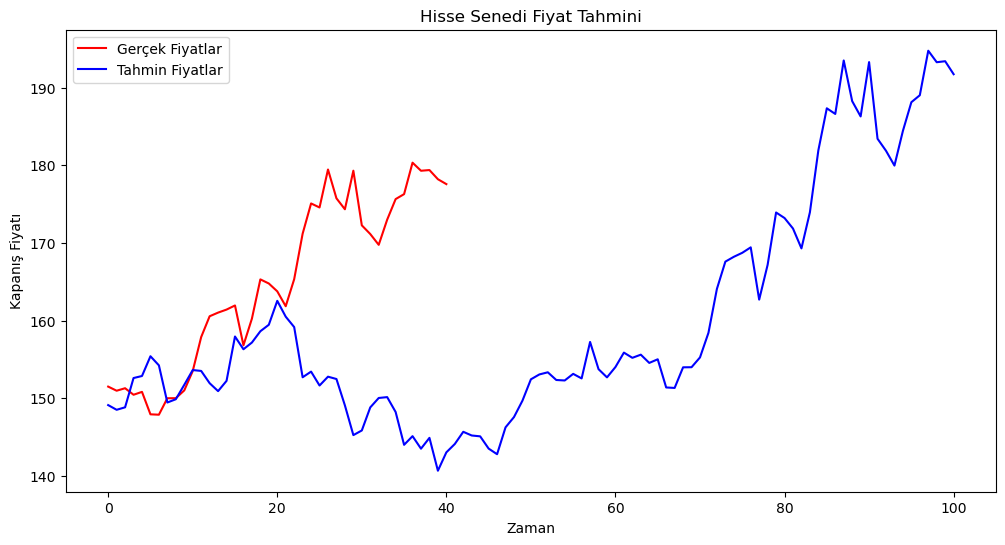

In [19]:
inputs = close_prices_scaled[len(close_prices_scaled) - len(test_data) - 1:]
inputs = inputs.reshape(-1,1)
X_test = []

for i in range(1, inputs.shape[0]):
    X_test.append(inputs[i-1:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = model.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

# Gerçek verileri alın
real_stock_price = data.iloc[train_size + 60:, 3:4].values

# Tahmin edilen ve gerçek fiyatları karşılaştırarak bir grafik oluşturun
plt.figure(figsize=(12,6))
plt.plot(real_stock_price, color = 'red', label = 'Gerçek Fiyatlar')
plt.plot(predicted_stock_price, color = 'blue', label = 'Tahmin Fiyatlar')
plt.title('Hisse Senedi Fiyat Tahmini')
plt.xlabel('Zaman')
plt.ylabel('Kapanış Fiyatı')
plt.legend()
plt.show()
